In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train_data.shape


(1460, 81)

In [ ]:
test_data.shape

(1459, 80)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
features_nullvalue=[col for col in train_data.columns if train_data[col].isnull().sum()>0]
features_nullvalue

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

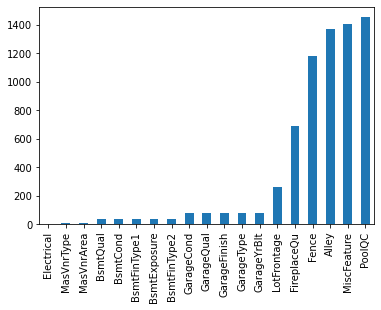

In [ ]:
features_nullvalue=train_data.isnull().sum()
features_nullvalue=features_nullvalue[train_data.isnull().sum()>0]
features_nullvalue.sort_values(inplace=True)
features_nullvalue.plot.bar()

In [ ]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


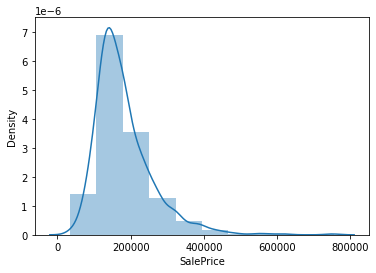

In [ ]:
sns.distplot(train_data['SalePrice'],kde=True,bins=10)

In [ ]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
#Numerical  discrete variable visulaization

In [ ]:
numerical_variabels=[col for col in train_data.columns if  train_data[col].dtypes=='O']

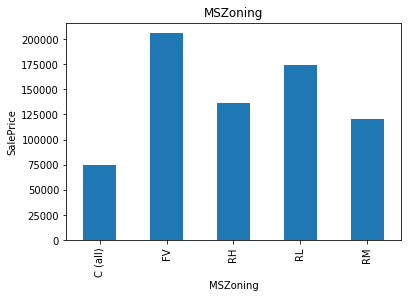

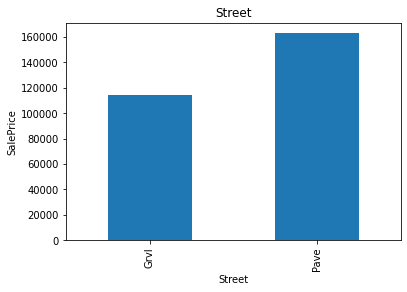

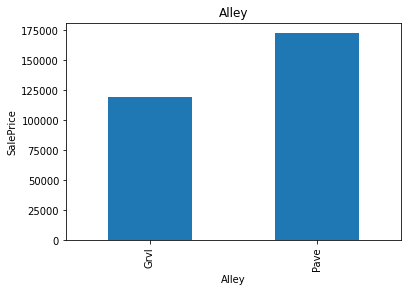

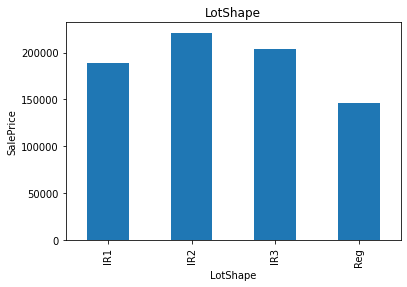

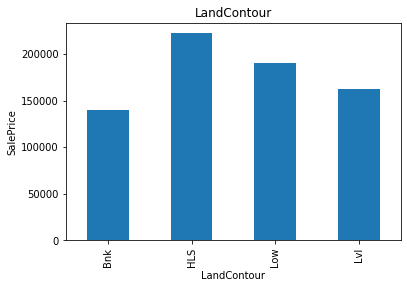

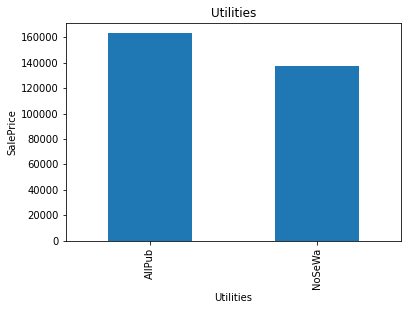

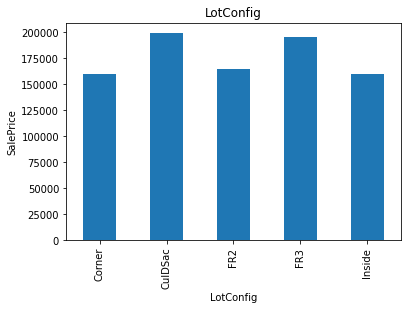

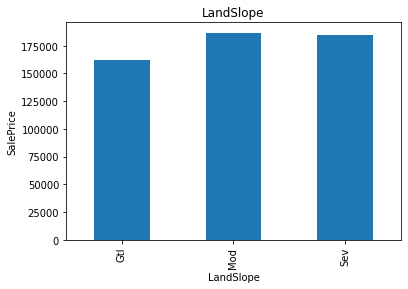

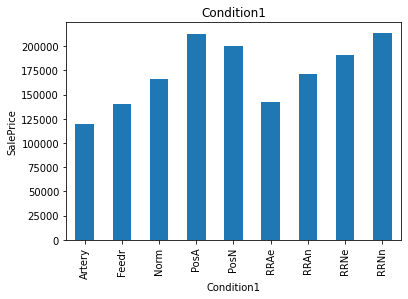

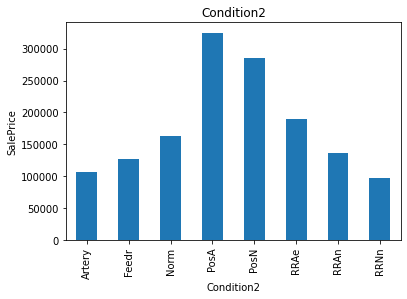

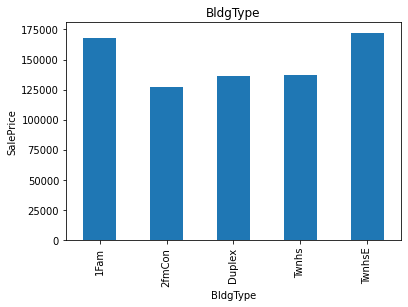

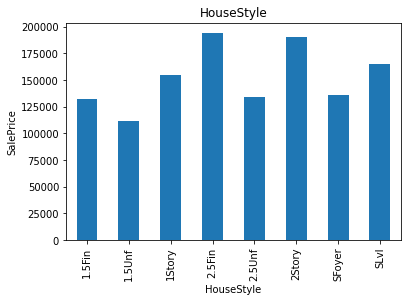

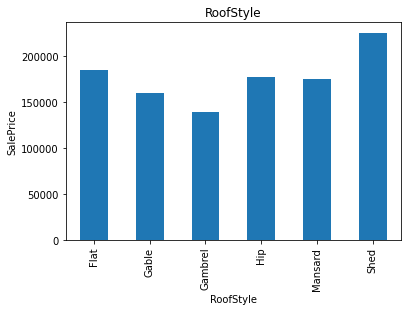

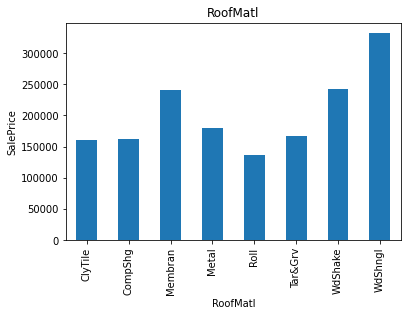

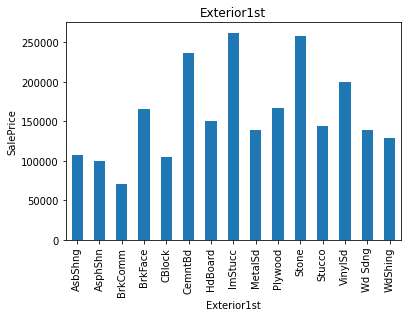

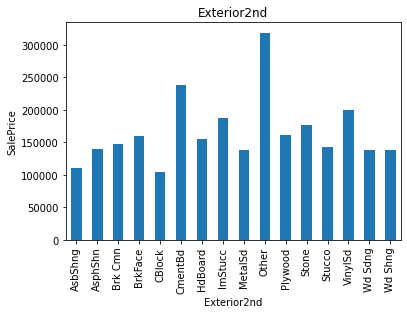

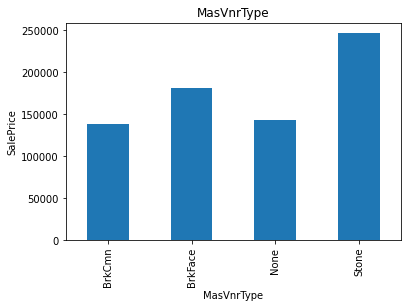

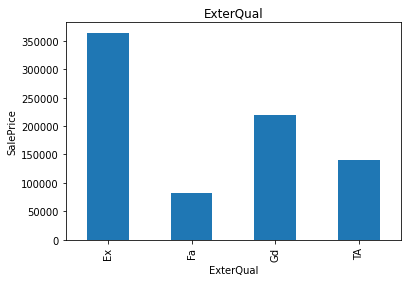

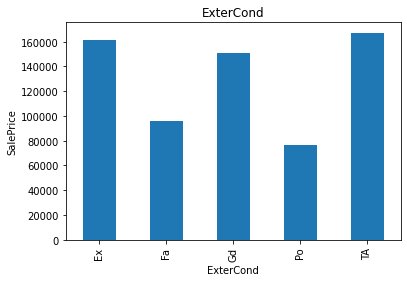

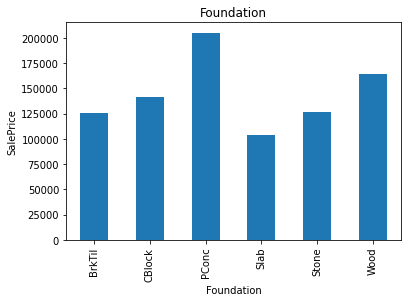

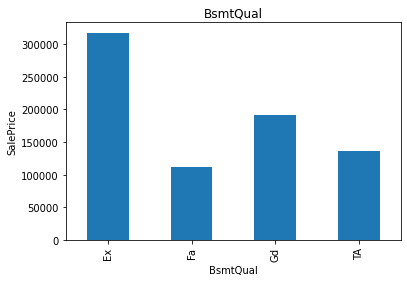

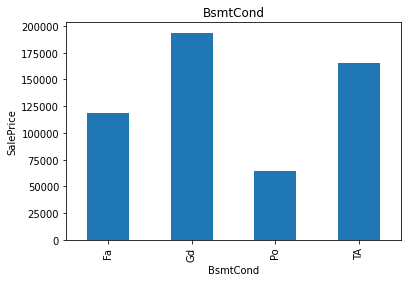

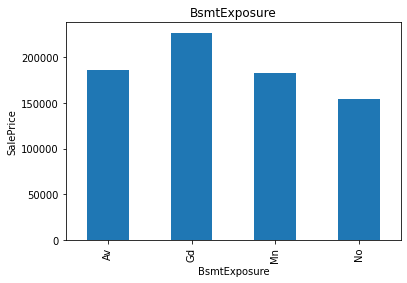

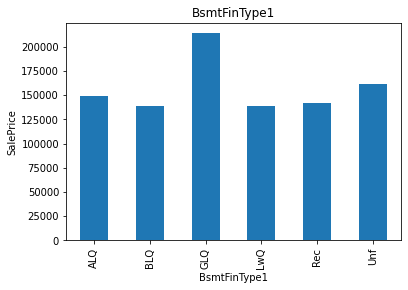

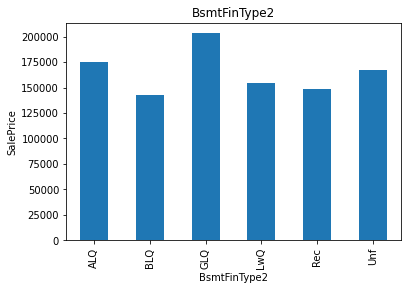

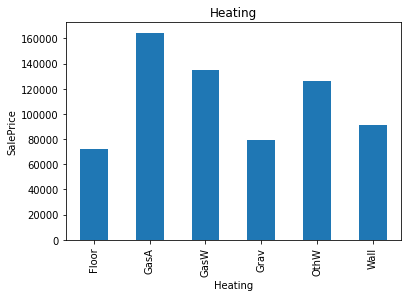

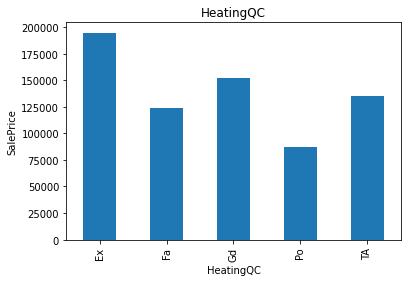

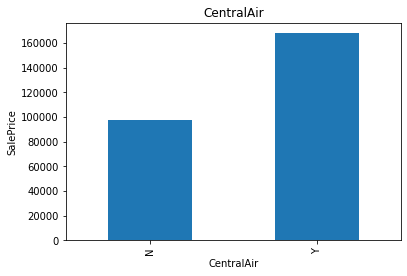

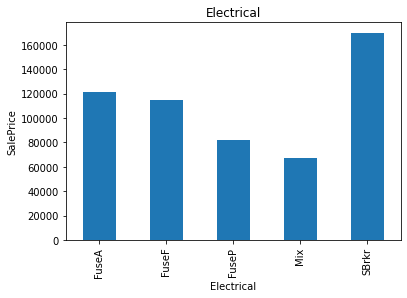

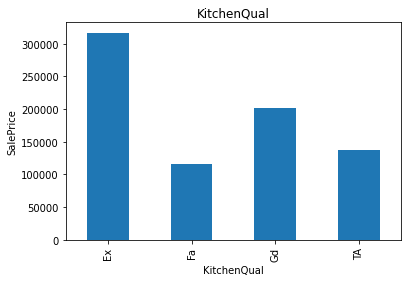

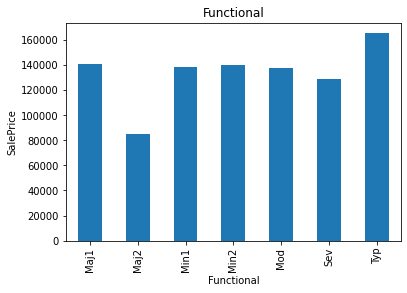

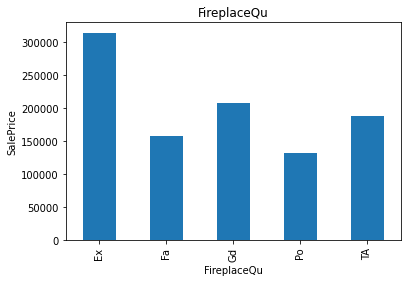

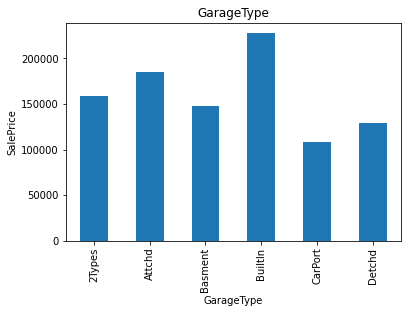

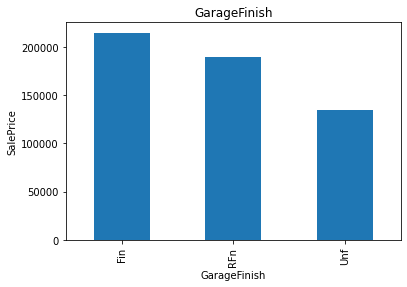

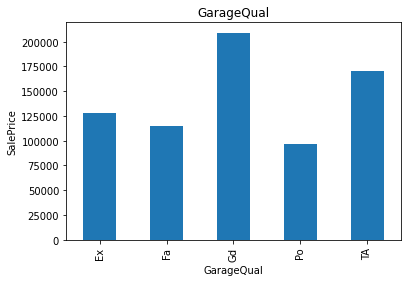

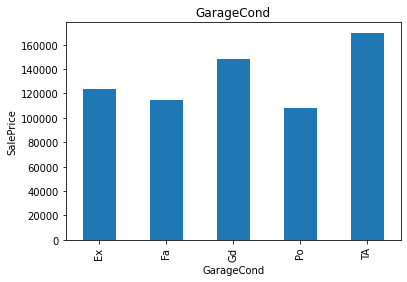

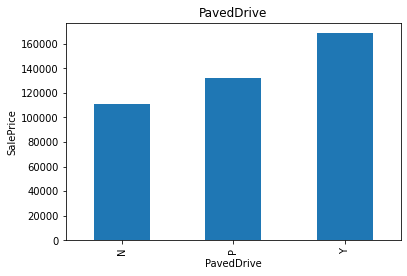

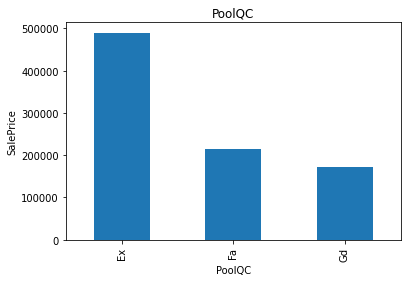

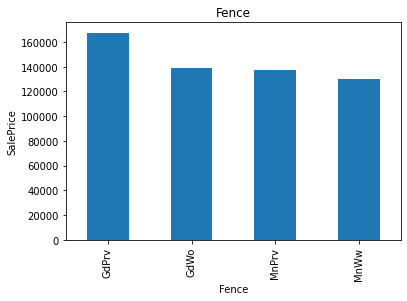

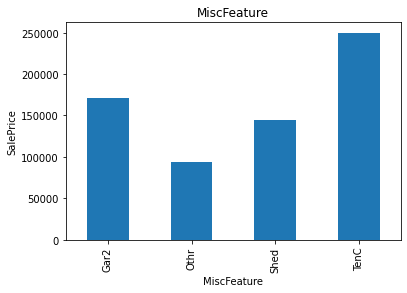

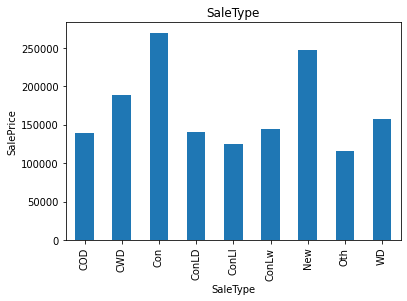

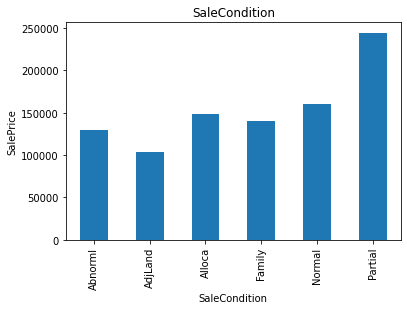

In [ ]:
discrete_variables=[col for col in numerical_variabels if len(train_data[col].unique())<25]
for feature in discrete_variables:
    data=train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()                  

In [ ]:
#Numerical  categorical variable visulaization

In [ ]:
continuous_variables=[col for col in numerical_variabels if feature not in discrete_variables]

In [ ]:
for feature in continuous_variables:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [ ]:
#outliers detection of SalePrice

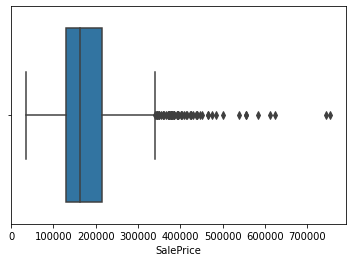

In [ ]:
sns.boxplot(x=train_data["SalePrice"])

In [ ]:
train_data.shape

(1460, 81)

In [ ]:
#drop rows due to outliers
IQR=train_data['SalePrice'].quantile(.75)-train_data['SalePrice'].quantile(.25)
renew_bound=train_data['SalePrice'].quantile(.75)+3*IQR
train_data.drop(train_data[train_data['SalePrice']>renew_bound].index,axis=0,inplace=True)
train_data.shape

(1448, 81)

In [ ]:
#correlation between numerical fetauresues

In [ ]:
df = pd.concat([test_data, train_data])
df.shape

(2907, 81)

In [ ]:
numerical_variabels=[col for col in df.columns if  df[col].dtypes!='O']
numerical_variabels

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

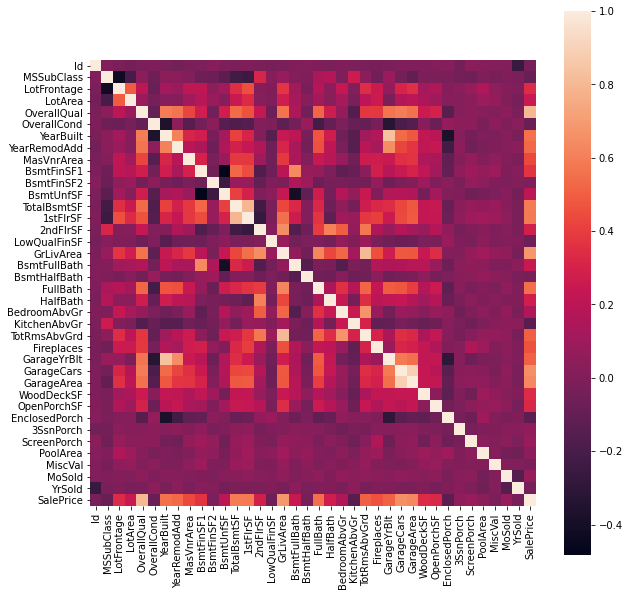

In [ ]:
correlation=df[numerical_variabels].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(correlation,square=True)

In [ ]:
#drop multicolinear features
df=df.drop(['GarageArea','1stFlrSF','FullBath','TotalBsmtSF'],axis=1)

In [ ]:
#drop colmuns with less correlation with SalePrice
corr_values=correlation["SalePrice"].sort_values(ascending=False),'\n'
corr_values

(SalePrice        1.000000
 OverallQual      0.800000
 GrLivArea        0.679068
 GarageCars       0.653663
 GarageArea       0.632507
 TotalBsmtSF      0.594397
 1stFlrSF         0.584448
 YearBuilt        0.556740
 FullBath         0.552082
 YearRemodAdd     0.534765
 GarageYrBlt      0.508040
 TotRmsAbvGrd     0.502738
 Fireplaces       0.461581
 MasVnrArea       0.433622
 BsmtFinSF1       0.364725
 LotFrontage      0.336667
 WoodDeckSF       0.334476
 OpenPorchSF      0.325409
 2ndFlrSF         0.287455
 HalfBath         0.278858
 LotArea          0.252031
 BsmtFullBath     0.242846
 BsmtUnfSF        0.211252
 BedroomAbvGr     0.164610
 ScreenPorch      0.081308
 MoSold           0.079185
 3SsnPorch        0.055720
 PoolArea         0.033403
 BsmtFinSF2      -0.011770
 MiscVal         -0.019849
 BsmtHalfBath    -0.031552
 YrSold          -0.034292
 Id              -0.034666
 LowQualFinSF    -0.060257
 OverallCond     -0.079676
 MSSubClass      -0.086540
 EnclosedPorch   -0.128520
 

In [ ]:
df=df.drop(['ScreenPorch','MoSold','3SsnPorch','PoolArea','BsmtFinSF2','MiscVal','BsmtHalfBath','YrSold','Id','LowQualFinSF','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr'],axis=1)   
df.shape


(2907, 63)

In [ ]:
#handling  misssing values of numerical features

In [ ]:
numerical_missval=[col for col in df.columns if df[col].isnull().sum()>1 and df[col].dtypes!='O']
for col in numerical_missval:
  print(col,df[col].isnull().mean())


LotFrontage 0.16683866529067767
MasVnrArea 0.007911936704506364
BsmtFullBath 0.0006879944960440316
GarageYrBlt 0.054695562435500514
SalePrice 0.5018919848641211


In [ ]:
for col in numerical_missval:
    ## We will replace by using median since there are outliers
    median=df[col].median()
    df[col].fillna(median,inplace=True)
df[numerical_missval].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
GarageYrBlt     0
SalePrice       0
dtype: int64

In [ ]:
# Handling missing values in categorical variable

In [ ]:
categorical_missval=[col for col in df.columns if df[col].isnull().sum()>1 and df[col].dtypes=='O']
categorical_missval

['MSZoning',
 'Alley',
 'Utilities',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
for col in categorical_missval:
  print(col,df[col].isnull().mean())

MSZoning 0.0013759889920880633
Alley 0.9318885448916409
Utilities 0.0006879944960440316
MasVnrType 0.008255933952528379
BsmtQual 0.02786377708978328
BsmtCond 0.0282077743378053
BsmtExposure 0.0282077743378053
BsmtFinType1 0.02717578259373925
BsmtFinType2 0.027519779841761266
Functional 0.0006879944960440316
FireplaceQu 0.4884760921912625
GarageType 0.054007567939456484
GarageFinish 0.054695562435500514
GarageQual 0.054695562435500514
GarageCond 0.054695562435500514
PoolQC 0.9969040247678018
Fence 0.804265565875473
MiscFeature 0.9638802889576883


In [ ]:
# replace columns with null values which have high effect to the dependent variable 

In [ ]:
df[categorical_missval]=df[categorical_missval].fillna('NewLlabel')
df[categorical_missval].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
#obj_df["num_cylinders"].value_counts()
categorical_variabels=[col for col in df.columns if  df[col].dtypes=='O']
categorical_variabels
df.shape

(2907, 63)

In [ ]:
# dummies one hot encoding maultiple

for feature in categorical_variabels:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

df.head()   

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,1,80.0,11622,1,2,0,1,2,0,0,8,1,4,3,5,5,1961,1961,1,2,11.0,13.0,1,0.0,1,3,2,2,3,1,1,468.0,2,270.0,5,2,1,4.0,0,896,0.0,0,2,1.0,5,7,0,1,5,1961.0,1,1.0,4,5,2,140,0,0,2,3,4.0,4,162000.0
1,4,81.0,14267,1,2,1,1,2,1,0,8,3,4,3,5,6,1958,1958,4,2,4.0,4.0,2,108.0,1,3,2,2,3,1,4,923.0,5,406.0,5,2,1,4.0,0,1329,0.0,1,3,2.0,6,7,0,1,5,1958.0,1,1.0,4,5,2,393,36,0,4,2,4.0,4,162000.0
2,4,74.0,13830,1,2,1,1,2,0,0,13,3,4,3,6,5,1997,1998,1,2,11.0,13.0,1,0.0,1,3,5,3,3,1,6,791.0,5,137.0,5,3,1,4.0,701,1629,0.0,1,3,1.0,6,7,1,3,5,1997.0,3,2.0,4,5,2,212,34,0,2,3,4.0,4,162000.0
3,4,78.0,9978,1,2,1,1,2,0,0,13,3,4,3,6,6,1998,1998,1,2,11.0,13.0,2,20.0,1,3,5,2,3,1,6,602.0,5,324.0,5,4,1,4.0,678,1604,0.0,1,3,2.0,7,7,1,4,5,1998.0,3,2.0,4,5,2,360,36,0,4,3,4.0,4,162000.0
4,4,43.0,5005,1,2,1,3,2,0,0,22,3,4,4,5,8,1992,1992,1,2,7.0,9.0,1,0.0,2,3,5,3,3,1,4,263.0,5,1017.0,5,4,1,4.0,0,1280,0.0,0,2,2.0,5,7,0,1,5,1992.0,2,2.0,4,5,2,0,82,0,4,3,4.0,4,162000.0


In [ ]:

# Feature Scaling
feature_scale=[feature for feature in df.columns if feature not in ['SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])
scaler.transform(df[feature_scale])

array([[0.2       , 0.20205479, 0.04824604, ..., 0.75      , 0.5       ,
        0.8       ],
       [0.8       , 0.20547945, 0.06060904, ..., 0.5       , 0.5       ,
        0.8       ],
       [0.8       , 0.18150685, 0.05856645, ..., 0.75      , 0.5       ,
        0.8       ],
       ...,
       [0.8       , 0.15410959, 0.03618687, ..., 0.25      , 0.5       ,
        0.8       ],
       [0.8       , 0.1609589 , 0.03934189, ..., 0.75      , 0.5       ,
        0.8       ],
       [0.8       , 0.18493151, 0.04037019, ..., 0.75      , 0.5       ,
        0.8       ]])

In [ ]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,1,80.0,11622,1,2,0,1,2,0,0,8,1,4,3,5,5,1961,1961,1,2,11.0,13.0,1,0.0,1,3,2,2,3,1,1,468.0,2,270.0,5,2,1,4.0,0,896,0.0,0,2,1.0,5,7,0,1,5,1961.0,1,1.0,4,5,2,140,0,0,2,3,4.0,4,162000.0
1,4,81.0,14267,1,2,1,1,2,1,0,8,3,4,3,5,6,1958,1958,4,2,4.0,4.0,2,108.0,1,3,2,2,3,1,4,923.0,5,406.0,5,2,1,4.0,0,1329,0.0,1,3,2.0,6,7,0,1,5,1958.0,1,1.0,4,5,2,393,36,0,4,2,4.0,4,162000.0
2,4,74.0,13830,1,2,1,1,2,0,0,13,3,4,3,6,5,1997,1998,1,2,11.0,13.0,1,0.0,1,3,5,3,3,1,6,791.0,5,137.0,5,3,1,4.0,701,1629,0.0,1,3,1.0,6,7,1,3,5,1997.0,3,2.0,4,5,2,212,34,0,2,3,4.0,4,162000.0
3,4,78.0,9978,1,2,1,1,2,0,0,13,3,4,3,6,6,1998,1998,1,2,11.0,13.0,2,20.0,1,3,5,2,3,1,6,602.0,5,324.0,5,4,1,4.0,678,1604,0.0,1,3,2.0,7,7,1,4,5,1998.0,3,2.0,4,5,2,360,36,0,4,3,4.0,4,162000.0
4,4,43.0,5005,1,2,1,3,2,0,0,22,3,4,4,5,8,1992,1992,1,2,7.0,9.0,1,0.0,2,3,5,3,3,1,4,263.0,5,1017.0,5,4,1,4.0,0,1280,0.0,0,2,2.0,5,7,0,1,5,1992.0,2,2.0,4,5,2,0,82,0,4,3,4.0,4,162000.0


In [ ]:
df = pd.concat([df[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
df.head()

,SalePrice,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,162000.0,0.2,0.202055,0.048246,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.333333,0.125,0.571429,0.75,0.714286,0.444444,0.644928,0.183333,0.2,0.285714,0.785714,0.866667,0.25,0.0000,0.333333,0.75,0.4,0.50,0.75,0.25,0.166667,0.082920,0.333333,0.115582,1.0,0.50,1.0,1.0,0.000000,0.105878,0.0,0.0,0.250,0.333333,0.230769,1.0,0.00,0.2,0.833333,0.211538,0.333333,0.2,0.8,1.0,1.0,0.098315,0.000000,0.0,0.5,0.75,0.5,0.8
1,162000.0,0.8,0.205479,0.060609,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.333333,0.375,0.571429,0.75,0.714286,0.555556,0.623188,0.133333,0.8,0.285714,0.285714,0.266667,0.50,0.0675,0.333333,0.75,0.4,0.50,0.75,0.25,0.666667,0.163536,0.833333,0.173801,1.0,0.50,1.0,1.0,0.000000,0.187453,0.0,0.5,0.375,0.666667,0.307692,1.0,0.00,0.2,0.833333,0.201923,0.333333,0.2,0.8,1.0,1.0,0.275983,0.048518,0.0,1.0,0.50,0.5,0.8
2,162000.0,0.8,0.181507,0.058566,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.541667,0.375,0.571429,0.75,0.857143,0.444444,0.905797,0.800000,0.2,0.285714,0.785714,0.866667,0.25,0.0000,0.333333,0.75,1.0,0.75,0.75,0.25,1.000000,0.140149,0.833333,0.058647,1.0,0.75,1.0,1.0,0.376477,0.243971,0.0,0.5,0.375,0.333333,0.307692,1.0,0.25,0.6,0.833333,0.326923,1.000000,0.4,0.8,1.0,1.0,0.148876,0.045822,0.0,0.5,0.75,0.5,0.8
3,162000.0,0.8,0.195205,0.040562,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.541667,0.375,0.571429,0.75,0.857143,0.555556,0.913043,0.800000,0.2,0.285714,0.785714,0.866667,0.50,0.0125,0.333333,0.75,1.0,0.50,0.75,0.25,1.000000,0.106662,0.833333,0.138699,1.0,1.00,1.0,1.0,0.364125,0.239261,0.0,0.5,0.375,0.666667,0.384615,1.0,0.25,0.8,0.833333,0.330128,1.000000,0.4,0.8,1.0,1.0,0.252809,0.048518,0.0,1.0,0.75,0.5,0.8
4,162000.0,0.8,0.075342,0.017318,1.0,1.0,0.333333,1.000000,1.0,0.00,0.0,0.916667,0.375,0.571429,1.00,0.714286,0.777778,0.869565,0.700000,0.2,0.285714,0.500000,0.600000,0.25,0.0000,0.666667,0.75,1.0,0.75,0.75,0.25,0.666667,0.046598,0.833333,0.435360,1.0,1.00,1.0,1.0,0.000000,0.178222,0.0,0.0,0.250,0.666667,0.230769,1.0,0.00,0.2,0.833333,0.310897,0.666667,0.4,0.8,1.0,1.0,0.000000,0.110512,0.0,1.0,0.75,0.5,0.8


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df['SalePrice'],test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg


In [ ]:
xgr=xg.XGBRegressor(base_score=0.25, booster='gbtree',gamma=0, learning_rate=0.1)
svr_model=SVR(kernel='linear')
randomfor=RandomForestRegressor(n_estimators=100,max_features='sqrt')
kneighbors=KNeighborsRegressor(n_neighbors=6)
ridgeReg=Ridge(alpha=0.05)


In [ ]:
#regressors=[xgr,randomfor,svr_model,kneighbors,ridgeReg]
#for model in regressors:
  #model.fit(X_train,y_train)
  #y_pred=model.predict(X_test)
  #rmse=np.sqrt(MSE(y_test,y_pred))
  #print(rmse)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
xgr.fit(X_train,y_train)
y_pred=xgr.predict(X_test)
rmse=np.sqrt(MSE(y_test,y_pred))
print(rmse)

[19:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
599.1698986841021


In [ ]:
#svr_model.fit(X_train,y_train)
#y_pred=svr_model.predict(X_test)
#rmse=np.sqrt(MSE(y_test,y_pred))
#print(rmse)

In [ ]:
#randomfor.fit(X_train,y_train)
#y_pred=randomfor.predict(X_test)
#rmse=np.sqrt(MSE(y_test,y_pred))
#print(rmse)

In [ ]:
#kneighbors.fit(X_train,y_train)
#y_pred=kneighbors.predict(X_test)
#rmse=np.sqrt(MSE(y_test,y_pred))
#print(rmse)

In [ ]:
#ridgeReg.fit(X_train,y_train)
#y_pred=ridgeReg.predict(X_test)
#rmse=np.sqrt(MSE(y_test,y_pred))
#print(rmse)

In [ ]:
#Comparing  Performance xgboostRegressor algotirhm is suite to train the model

In [ ]:
#more hyper parameter tuning on XGboost Regressor
regressor=xg.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
rmse=np.sqrt(MSE(y_test,y_pred))
print(rmse)

722.7084526924094
